In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
filepath = "./GEO Samples/min_max_normalized_train_samples_with_lables.csv"
data = pd.read_csv(filepath)
data
# Each class number of sample set

# 0    300
# 1    265
# 2     72
# 3    331
# 4     32

,Stage,Age,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,MIMAT0002823,MIMAT0002807,MIMAT0002806,MIMAT0001635,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,2,0.480000,0.321060,0.266433,0.165006,0.048775,0.151213,0.041253,0.298427,0.253691,...,0.367587,0.035934,0.013204,0.343176,0.109860,0.049991,0.263645,0.131979,0.057850,0.287974
1,0,0.533333,0.651836,0.630531,0.316243,0.165648,0.392488,0.110860,0.592037,0.416767,...,0.831395,0.173907,0.079024,0.782782,0.353564,0.169274,0.625933,0.337980,0.183165,0.642786
2,4,0.440000,0.292976,0.179838,0.146170,0.021972,0.155444,0.020483,0.252863,0.143605,...,0.317303,0.013381,0.004096,0.342294,0.100369,0.006860,0.227782,0.034045,0.019502,0.252570
3,2,0.453333,0.429064,0.349010,0.172217,0.038008,0.210098,0.053645,0.463395,0.296785,...,0.710883,0.093325,0.020720,0.800684,0.336016,0.068746,0.595334,0.211104,0.157941,0.550660
4,2,0.520000,0.368015,0.249077,0.166275,0.035217,0.178813,0.015068,0.316886,0.210087,...,0.345389,0.025096,0.003049,0.376646,0.101470,0.017007,0.267681,0.038827,0.035250,0.294666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,0,0.946667,0.481881,0.393085,0.201341,0.178634,0.194125,0.163484,0.425189,0.260895,...,0.476980,0.180029,0.165898,0.469901,0.261573,0.174016,0.442810,0.380455,0.263986,0.442971
1175,4,0.573333,0.291112,0.237233,0.136013,0.027563,0.120341,0.021140,0.281499,0.178980,...,0.267178,0.014127,0.004798,0.303132,0.080912,0.009343,0.197572,0.037733,0.016482,0.248662
1176,4,0.653333,0.328218,0.272279,0.149823,0.088086,0.179046,0.063104,0.271301,0.159985,...,0.354049,0.126690,0.069371,0.330936,0.171534,0.154813,0.279304,0.158245,0.145019,0.335629
1177,2,0.520000,0.256050,0.215256,0.125055,0.015617,0.114777,0.014428,0.255704,0.122048,...,0.363109,0.030488,0.009126,0.359054,0.144426,0.028518,0.236278,0.070319,0.033866,0.277698


In [3]:
 data['Stage'].value_counts()

Stage
3    265
0    240
4    234
2    228
1    212
Name: count, dtype: int64

In [4]:
y = data.loc[:, data.columns == 'Stage']
x = data.loc[:, data.columns != 'Stage']
x

,Age,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,MIMAT0002823,MIMAT0002807,MIMAT0002806,MIMAT0001635,MIMAT0001631,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,0.480000,0.321060,0.266433,0.165006,0.048775,0.151213,0.041253,0.298427,0.253691,0.052721,...,0.367587,0.035934,0.013204,0.343176,0.109860,0.049991,0.263645,0.131979,0.057850,0.287974
1,0.533333,0.651836,0.630531,0.316243,0.165648,0.392488,0.110860,0.592037,0.416767,0.020281,...,0.831395,0.173907,0.079024,0.782782,0.353564,0.169274,0.625933,0.337980,0.183165,0.642786
2,0.440000,0.292976,0.179838,0.146170,0.021972,0.155444,0.020483,0.252863,0.143605,0.005901,...,0.317303,0.013381,0.004096,0.342294,0.100369,0.006860,0.227782,0.034045,0.019502,0.252570
3,0.453333,0.429064,0.349010,0.172217,0.038008,0.210098,0.053645,0.463395,0.296785,0.012903,...,0.710883,0.093325,0.020720,0.800684,0.336016,0.068746,0.595334,0.211104,0.157941,0.550660
4,0.520000,0.368015,0.249077,0.166275,0.035217,0.178813,0.015068,0.316886,0.210087,0.013100,...,0.345389,0.025096,0.003049,0.376646,0.101470,0.017007,0.267681,0.038827,0.035250,0.294666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,0.946667,0.481881,0.393085,0.201341,0.178634,0.194125,0.163484,0.425189,0.260895,0.010173,...,0.476980,0.180029,0.165898,0.469901,0.261573,0.174016,0.442810,0.380455,0.263986,0.442971
1175,0.573333,0.291112,0.237233,0.136013,0.027563,0.120341,0.021140,0.281499,0.178980,0.010184,...,0.267178,0.014127,0.004798,0.303132,0.080912,0.009343,0.197572,0.037733,0.016482,0.248662
1176,0.653333,0.328218,0.272279,0.149823,0.088086,0.179046,0.063104,0.271301,0.159985,0.024252,...,0.354049,0.126690,0.069371,0.330936,0.171534,0.154813,0.279304,0.158245,0.145019,0.335629
1177,0.520000,0.256050,0.215256,0.125055,0.015617,0.114777,0.014428,0.255704,0.122048,0.028619,...,0.363109,0.030488,0.009126,0.359054,0.144426,0.028518,0.236278,0.070319,0.033866,0.277698


In [15]:
# Do this once for the record!

# col = data.columns
# filepath = "./GEO Samples/"

# with open(filepath+"list of miRNA parts.txt", "w") as txt_file:
#     for line in col:
#         txt_file.write(line + "\n") 

In [5]:
# Train Random Forest on full data and get feature importances
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(x, y["Stage"])

# Get feature importances and select top k
RF_importances = model.feature_importances_
indices = np.argsort(RF_importances)[::-1]  # Sort descending

top_k = 100
top_indices = indices[:top_k]
rf_x_selected = x.iloc[:, top_indices]
rf_x_selected

,MIMAT0015064,MIMAT0003240,MIMAT0004951,MIMAT0016904,MIMAT0030996,MIMAT0019229,MIMAT0019015,MIMAT0019852,MIMAT0027496,MIMAT0026477,...,MIMAT0004928,MIMAT0018196,MIMAT0027640,MIMAT0007887,MIMAT0016900,MIMAT0016883,MIMAT0005792,MIMAT0005898,MIMAT0019213,MIMAT0022474
0,0.004633,0.004556,0.006598,0.025350,0.010143,0.008496,0.011855,0.003569,0.006113,0.010523,...,0.073949,0.290197,0.005529,0.235171,0.018761,0.115187,0.064969,0.035878,0.169169,0.166541
1,0.076782,0.038617,0.069680,0.125223,0.066832,0.064447,0.049615,0.065505,0.053845,0.091502,...,0.200051,0.798790,0.045537,0.702319,0.076121,0.320438,0.124891,0.015149,0.376462,0.396716
2,0.004261,0.002922,0.003091,0.021443,0.019226,0.010639,0.009306,0.007304,0.002428,0.006837,...,0.106256,0.310864,0.008385,0.232705,0.026922,0.120860,0.035212,0.003973,0.121988,0.123529
3,0.008484,0.006617,0.009459,0.060351,0.003274,0.003136,0.019102,0.002704,0.003099,0.023160,...,0.136518,0.539399,0.009762,0.455750,0.019808,0.215881,0.094577,0.007418,0.192911,0.233002
4,0.003345,0.003934,0.004645,0.029653,0.011179,0.005360,0.006310,0.001209,0.003346,0.005754,...,0.081000,0.368269,0.002825,0.360950,0.007927,0.122215,0.043089,0.005604,0.123569,0.177198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,0.121483,0.045978,0.071599,0.110381,0.168694,0.184167,0.147017,0.429051,0.064519,0.181527,...,0.117261,0.449546,0.065448,0.521319,0.186993,0.244042,0.140355,0.007976,0.254152,0.237738
1175,0.001400,0.004009,0.004879,0.002690,0.006565,0.004936,0.006970,0.002850,0.003049,0.003404,...,0.066587,0.333077,0.003111,0.226131,0.011004,0.131358,0.031924,0.004266,0.112195,0.073763
1176,0.018750,0.020606,0.021423,0.036547,0.054830,0.035273,0.025969,0.027965,0.029740,0.029933,...,0.074087,0.389135,0.061500,0.248065,0.066701,0.169622,0.112836,0.078995,0.191447,0.122246
1177,0.001868,0.003087,0.004788,0.010945,0.006875,0.005396,0.012141,0.001771,0.004023,0.010206,...,0.060509,0.338139,0.005235,0.245911,0.017158,0.103724,0.050383,0.040282,0.140472,0.125716


In [6]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

k = 100
mi_selector = SelectKBest(score_func=mutual_info_classif, k=k)
x_mi_selected = mi_selector.fit_transform(x, y["Stage"])

# Get the actual indices of selected features
mi_indices = mi_selector.get_support(indices=True)
mi_indices

array([  28,   68,   99,  178,  218,  222,  234,  251,  301,  417,  432,
        437,  460,  472,  499,  542,  546,  569,  570,  621,  634,  687,
        702,  703,  712,  713,  767,  774,  791,  828,  834,  859,  866,
        876,  945,  970,  991, 1005, 1014, 1022, 1039, 1101, 1140, 1168,
       1181, 1183, 1193, 1213, 1246, 1263, 1270, 1299, 1313, 1319, 1454,
       1460, 1466, 1475, 1502, 1503, 1509, 1511, 1536, 1550, 1576, 1599,
       1606, 1693, 1699, 1802, 1803, 1806, 1815, 1951, 1961, 1962, 1978,
       2025, 2040, 2054, 2084, 2085, 2101, 2109, 2137, 2149, 2189, 2197,
       2213, 2223, 2231, 2286, 2287, 2288, 2358, 2372, 2436, 2444, 2521,
       2542], dtype=int64)

In [8]:
# Get top k feature indices by model importance
top_k_model_indices = np.argsort(RF_importances)[::-1][:k]

# Compare overlap
overlap = set(mi_indices) & set(top_k_model_indices)
print(f"Overlap count: {len(overlap)} out of {k}")
print(f"Overlap indices: {sorted(overlap)}")


Overlap count: 45 out of 100
Overlap indices: [28, 68, 99, 218, 222, 234, 251, 432, 472, 542, 702, 713, 767, 828, 834, 866, 876, 970, 1005, 1039, 1101, 1140, 1168, 1183, 1313, 1319, 1460, 1550, 1576, 1606, 1802, 1806, 1815, 1961, 1962, 2054, 2084, 2101, 2109, 2137, 2189, 2197, 2231, 2358, 2542]


In [9]:
x_validated = x.iloc[:, sorted(overlap)]
x_validated

,MIMAT0005905,MIMAT0027511,MIMAT0007888,MIMAT0022260,MIMAT0027540,MIMAT0030996,MIMAT0004602,MIMAT0015058,MIMAT0027600,MIMAT0027532,...,MIMAT0019710,MIMAT0004982,MIMAT0005586,MIMAT0016904,MIMAT0027462,MIMAT0016878,MIMAT0018925,MIMAT0003308,MIMAT0019069,MIMAT0027678
0,0.025316,0.021317,0.027344,0.019922,0.008474,0.010143,0.000332,0.015625,0.015166,0.013157,...,0.008960,0.013301,0.008901,0.025350,0.011162,0.042740,0.009998,0.015720,0.005291,0.013204
1,0.075193,0.089498,0.136878,0.083678,0.021734,0.066832,0.010150,0.071388,0.082758,0.109904,...,0.079054,0.078381,0.047978,0.125223,0.053755,0.092271,0.037504,0.067263,0.054603,0.079024
2,0.006139,0.009533,0.011401,0.004260,0.000625,0.019226,0.000550,0.010015,0.017116,0.010986,...,0.008390,0.003143,0.011893,0.021443,0.004858,0.006881,0.002657,0.022649,0.001915,0.004096
3,0.033216,0.018407,0.046828,0.018303,0.004018,0.003274,0.002766,0.007870,0.004571,0.008177,...,0.027429,0.013410,0.014849,0.060351,0.002592,0.031233,0.003155,0.001976,0.003029,0.020720
4,0.014604,0.008284,0.023791,0.010526,0.004860,0.011179,0.000943,0.007611,0.011185,0.006949,...,0.011462,0.007555,0.009566,0.029653,0.004204,0.013923,0.003179,0.010850,0.001443,0.003049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,0.147351,0.123930,0.135164,0.089130,0.055763,0.168694,0.014374,0.178111,0.182369,0.153661,...,0.064729,0.068356,0.080792,0.110381,0.142279,0.143024,0.071135,0.165441,0.062410,0.165898
1175,0.014856,0.008702,0.023960,0.003433,0.000403,0.006565,0.000474,0.006623,0.005207,0.006774,...,0.000000,0.006128,0.001842,0.002690,0.002709,0.011083,0.003887,0.002965,0.003748,0.004798
1176,0.041477,0.070236,0.084824,0.049999,0.035269,0.054830,0.001988,0.079357,0.076277,0.073453,...,0.015358,0.041044,0.034045,0.036547,0.048062,0.058674,0.032161,0.067382,0.027107,0.069371
1177,0.018048,0.006942,0.012514,0.007716,0.004662,0.006875,0.000521,0.009413,0.009107,0.008881,...,0.003613,0.008328,0.001196,0.010945,0.007547,0.015693,0.004723,0.006290,0.004376,0.009126


In [10]:
filepath = "./GEO Samples/dimension_reduced_data.csv"
x_validated.to_csv(filepath, index=False)

In [11]:
filepath = "./GEO Samples/dimension_reduced_data_lables.csv"
y.to_csv(filepath, index=False)

In [64]:
x = x_validated

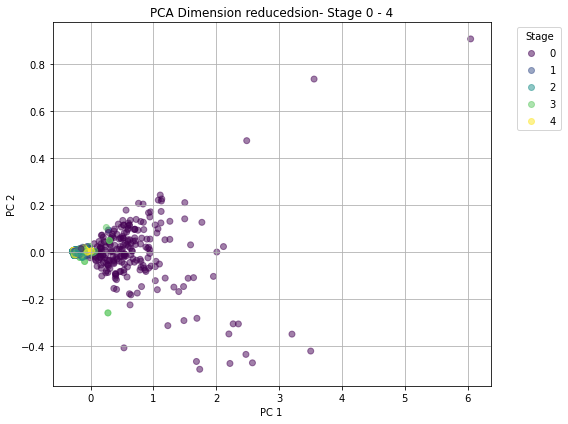

In [65]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

df_pca = pd.DataFrame(x_pca, columns=["PC1", "PC2"])
df_pca["Stage"] = y["Stage"].values


# Plot PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_pca["PC1"], df_pca["PC2"],
    c=y["Stage"],
    cmap='viridis',        # Try 'Set1', 'tab20', or 'nipy_spectral' for more color variety
    alpha=0.5           # Higher opacity
)
plt.legend(*scatter.legend_elements(), title="Stage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PCA Dimension reducedsion- Stage 0 - 4")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
s0 = df_pca[df_pca["PC1"] > 2]
s0

,PC1,PC2,Stage
64,2.350943,-0.305971,0
86,3.555741,0.737040,0
128,2.199715,-0.348682,0
366,2.267979,-0.305630,0
459,6.047560,0.908051,0
487,2.113817,0.023549,0
513,2.216774,-0.474400,0
527,2.574777,-0.471675,0
586,2.470982,-0.435790,0
724,2.008013,0.000213,0


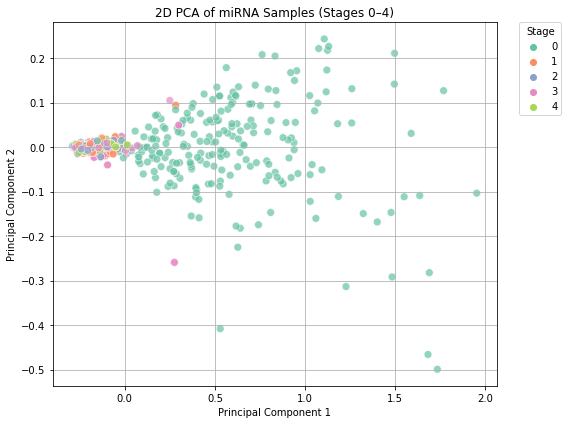

In [75]:
# Drop the Outliers!

df = df_pca
df = df.drop( s0.index.tolist())


# Step 4: Seaborn scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="PC1", y="PC2",
    hue="Stage",
    palette="Set2",
    alpha=0.7,
    s=60
)
plt.title("2D PCA of miRNA Samples (Stages 0–4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title="Stage", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

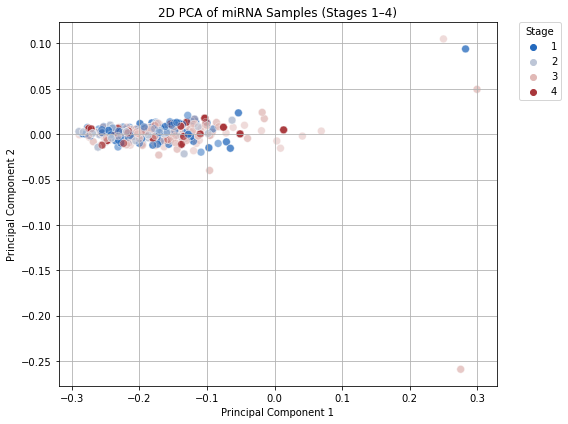

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Step 1: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# Step 2: Create DataFrame with PCA components and stage labels
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Stage"] = y["Stage"].values

# Step 3: Filter out Stage 0
df_filtered = df_pca[df_pca["Stage"] != 0]

# Step 4: Seaborn scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_filtered,
    x="PC1", y="PC2",
    hue="Stage",
    palette="vlag",
    alpha=0.5,
    s=60
)
plt.title("2D PCA of miRNA Samples (Stages 1–4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title="Stage", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


In [48]:
s3 = df_filtered[df_filtered["Stage"] == 3]
s3

,PC1,PC2,Stage
9,-0.241725,0.004451,3
12,-0.271197,0.005840,3
17,-0.213314,-0.012143,3
19,-0.259404,0.000375,3
22,-0.195606,0.004683,3
...,...,...,...
1159,-0.182030,0.005452,3
1163,-0.172306,0.012116,3
1165,-0.100053,0.009469,3
1168,-0.195946,0.002974,3


In [51]:
s3[s3["PC1"] > .2]


,PC1,PC2,Stage
277,0.275146,-0.259051,3
283,0.275146,-0.259051,3
494,0.249662,0.104918,3
1042,0.299262,0.049344,3
1104,0.299262,0.049344,3


In [52]:
s1 = df_filtered[df_filtered["Stage"] == 1]
s1[s1["PC1"] > .2]

,PC1,PC2,Stage
13,0.282323,0.093888,1
152,0.282323,0.093888,1


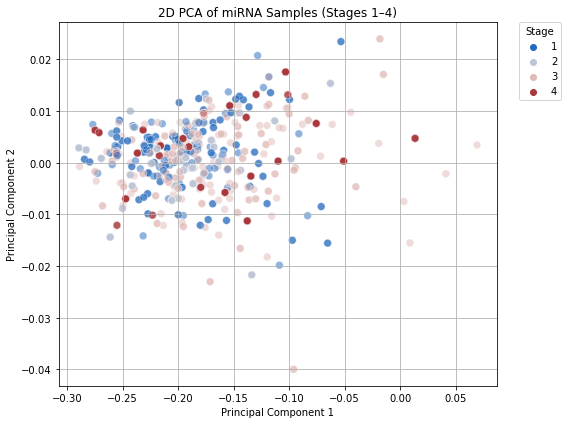

In [54]:
# Drop the Outliers!

df = df_filtered
df = df.drop([13, 152, 277, 283, 494, 1042, 1104])

# Step 4: Seaborn scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="PC1", y="PC2",
    hue="Stage",
    palette="vlag",
    alpha=0.5,
    s=60
)
plt.title("2D PCA of miRNA Samples (Stages 1–4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title="Stage", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()
